<a href="https://apssdc.in"><img src="../img/logo.png" width="800" align="center"></a>

<h1><center>K-Means Clustering</center></h1>

## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression

### Using k-means for customer segmentation


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Clustering/Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [6]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

<h2 id="pre_processing">Pre-processing</h2

As you can see, __Address__, __Customer Id__ in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [7]:
df.drop(['Customer Id', 'Address'], axis = 1, inplace = True)

df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [8]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [9]:
df.shape

(850, 8)

In [10]:
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

mean,median value,contant value, mode values

In [11]:
df.fillna(0.0, inplace = True)
df1 = df.fillna(0.0)
df.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [14]:
df['Income'].max()

446

In [15]:
df['Edu'].max()

5

In [16]:
df['Card Debt'].max()

20.561

1cm, 5m, 100km


0.01m, 5m, 100000m

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

scaData = ss.fit_transform(df)

scaData

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [19]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3)

model.fit(scaData)

KMeans(n_clusters=3)

In [20]:
model.predict(scaData)

array([1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2,
       1, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0,
       0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2,
       0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1,

In [21]:
df['output'] = model.predict(scaData)

df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,output
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,2
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,0


In [22]:
df.groupby('output').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
output,,,,,,,,
0,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646
1,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578


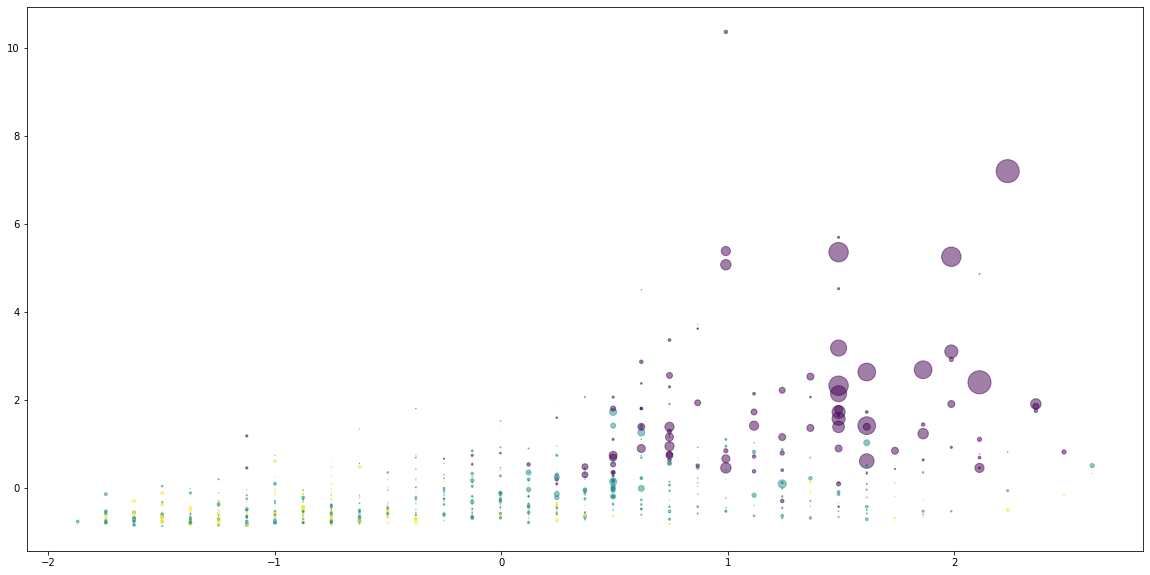

In [23]:
import numpy as np
plt.figure(figsize = (20, 10))
shape = np.pi * (scaData[:, 2] ** 4) #pi * r ** 2
plt.scatter(scaData[:, 0], scaData[:, 3], s = shape,c = df['output'].astype('float'), alpha = 0.5)

plt.show()

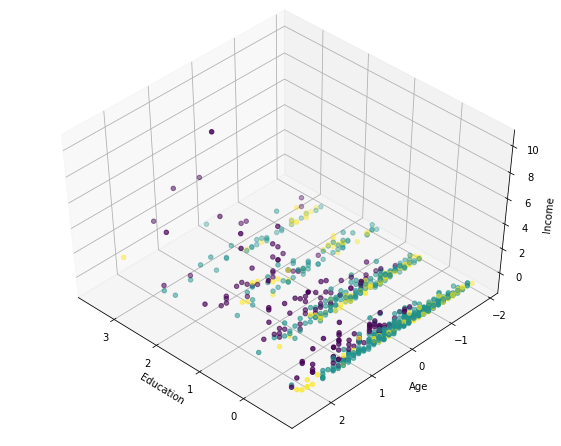

In [24]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(scaData[:, 1], scaData[:, 0], scaData[:, 3], c= df['output'].astype(np.float))
